<a href="https://colab.research.google.com/github/JoshuaUgarte/CLASETHC/blob/Trabajo-en-clase/clase071123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd #importante correr las librerias antes de ejecutar, y escribir bien la libreria
import matplotlib.pyplot as plt


In [17]:
df.info#los co,mandos df no se usan en bases de datos grandes

<bound method DataFrame.info of                              Country  No. of confirmed cases  \
Date                                                           
2014-08-29                    Guinea                   482.0   
2014-08-29                   Nigeria                    15.0   
2014-08-29              Sierra Leone                   935.0   
2014-08-29                   Liberia                   322.0   
2014-09-05                    Guinea                   604.0   
...                              ...                     ...   
2016-03-23                   Liberia                  3151.0   
2016-03-23                     Italy                     1.0   
2016-03-23                   Liberia                     2.0   
2016-03-23                   Nigeria                    19.0   
2016-03-23  United States of America                     4.0   

            No. of confirmed deaths  
Date                                 
2014-08-29                    287.0  
2014-08-29           

In [13]:
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df = pd.read_csv(url,sep=',',index_col=1) #sep es separador, csv es coma separate verius, archiovos separados por comas

In [14]:
df.tail()#por defaul imprime los primeros cinco


,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2016-03-23,Liberia,3151.0,NaN
2016-03-23,Italy,1.0,NaN
2016-03-23,Liberia,2.0,1.0
2016-03-23,Nigeria,19.0,7.0
2016-03-23,United States of America,4.0,1.0


In [15]:
df


,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Guinea,482.0,287.0
2014-08-29,Nigeria,15.0,6.0
2014-08-29,Sierra Leone,935.0,380.0
2014-08-29,Liberia,322.0,225.0
2014-09-05,Guinea,604.0,362.0
...,...,...,...
2016-03-23,Liberia,3151.0,NaN
2016-03-23,Italy,1.0,NaN
2016-03-23,Liberia,2.0,1.0


In [16]:
df.shape

(2484, 3)

In [19]:
df.isnull().sum()#datos faltantes, datos sesgados

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    836
dtype: int64

In [ ]:
df['Country'].isin(['Mexico']).sum()#los brackets son para buscar una columna en la base de datos, pasa saber si es que esta o no un dato dentro de a columna se busca por nombre

In [32]:
SL=df[df['Country']=='Sierra Leone']#mascara buleana, con el df nos asigna unicamente los verdaderos de la marcara buleana

In [28]:
SL=SL.drop('Country', axis=1)#para borrar la columna de sierra leone en las bysquedas de datos

In [33]:
SL.head()

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Sierra Leone,935.0,380.0
2014-09-05,Sierra Leone,1146.0,443.0
2014-09-08,Sierra Leone,1234.0,461.0
2014-09-12,Sierra Leone,1287.0,478.0
2014-09-16,Sierra Leone,1464.0,514.0


In [ ]:
SL[15:20]

In [35]:
SL.shape

(259, 3)

(259, 3)

In [36]:
SL.isnull().sum()

Country                    0
No. of confirmed cases     0
No. of confirmed deaths    2
dtype: int64

In [ ]:
SL.fillna()#para rellenar datos faltantes

In [37]:
SL.fillna(0.0,inplace=True)#rellana lps datos con el numero cero

<ipython-input-37-4e2c37e9e306>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL.fillna(0.0,inplace=True)#rellana lps datos con el numero cero


In [38]:
SL.isnull().sum()

Country                    0
No. of confirmed cases     0
No. of confirmed deaths    0
dtype: int64

In [39]:
SL['No. of confirmed deaths'].mean()#saca unicamente el NCC despues de rellenar los datos con ceros

3081.019305019305

In [40]:
SL['No. of confirmed cases'].mean()#saca unicamente el NCC despues de rellenar los datos con ceros

7883.671814671815

In [43]:
Dates=SL.index[0:-1:10]
NCC=SL['No. of confirmed cases'][0:-1:10]#crea una variable para los NCC, del primer dato hasta el ultimo de 10 en 10
NCD=SL['No. of confirmed deaths'][0:-1:10]#""""

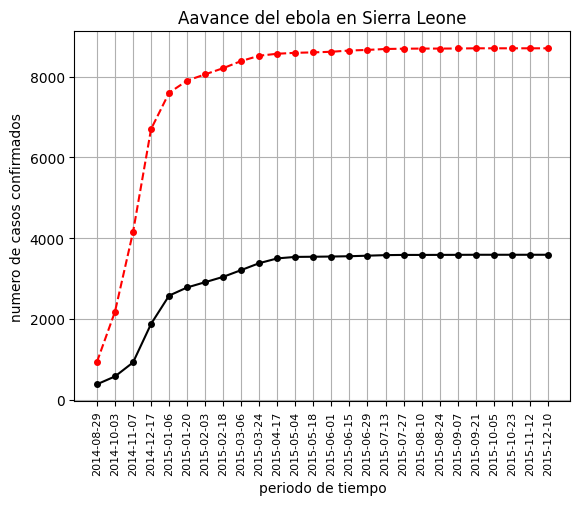

In [51]:
plt.plot(Dates,NCC,'o--r',ms=4,label='Infectados')
plt.plot(Dates,NCD,'o-k',ms=4,label='decesos')
plt.grid()
plt.title('Aavance del ebola en Sierra Leone')#titulo
plt.xlabel('periodo de tiempo')#etiqueta eje x
plt.ylabel('numero de casos confirmados')#etiqueta en eje y
plt.xticks(rotation=90,fontsize=8)
plt.show()

In [53]:
PIvsD=100*SL['No. of confirmed deaths']/SL['No. of confirmed cases']
SL['PIvsD']=PIvsD

<ipython-input-53-8a18c4adbf83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL['PIvsD']=PIvsD


In [57]:
SL.head()

,Country,No. of confirmed cases,No. of confirmed deaths,PIvsD,recuperados
Date,,,,,
2014-08-29,Sierra Leone,935.0,380.0,40.641711,555.0
2014-09-05,Sierra Leone,1146.0,443.0,38.656195,703.0
2014-09-08,Sierra Leone,1234.0,461.0,37.358185,773.0
2014-09-12,Sierra Leone,1287.0,478.0,37.140637,809.0
2014-09-16,Sierra Leone,1464.0,514.0,35.109290,950.0


In [56]:
recuperados=((100-PIvsD))/100*SL['No. of confirmed cases']
SL['recuperados']=recuperados

<ipython-input-56-3365ba32aa71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL['recuperados']=recuperados
